In [1]:
! pip install -U lyft_dataset_sdk

     |████████████████████████████████| 81 kB 926 kB/s eta 0:00:011
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=1fcd2bc4e1c3e5f7d74df71ab04f2c2fecb05a7abe8cfe3ddd7aebf68992cc53
  Stored in directory: /root/.cache/pip/wheels/95/38/e1/8b62337a8ecf5728bdc1017e828f253f7a9cf25db999861bec
Successfully built fire
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
# gotta do this for LyftDataset SDK, it expects folders to be named as `images`, `maps`, `lidar`

!ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_images images
!ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_maps maps
!ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_lidar lidar
!ln -s /kaggle/input/3d-object-detection-for-autonomous-vehicles/train_data data

In [3]:
from lyft_dataset_sdk.lyftdataset import LyftDataset

lyftdata = LyftDataset(data_path='.', json_path='data/', verbose=True)

9 category,
18 attribute,
4 visibility,
18421 instance,
10 sensor,
148 calibrated_sensor,
177789 ego_pose,
180 log,
180 scene,
22680 sample,
189504 sample_data,
638179 sample_annotation,
1 map,
Done loading in 12.8 seconds.
Reverse indexing ...
Done reverse indexing in 4.7 seconds.


In [4]:
lyftdata.list_scenes()

host-a007-lidar0-1230485630199365106-12304856550990... [19-01-02 17:33:50]   25s, Palo Alto, #anns:1559
host-a007-lidar0-1230672860198383106-12306728850991... [19-01-04 21:34:20]   25s, Palo Alto, #anns:2969
host-a007-lidar0-1230936221299185986-12309362461986... [19-01-07 22:43:41]   25s, Palo Alto, #anns:683
host-a007-lidar0-1231093036199514746-12310930610996... [19-01-09 18:17:16]   25s, Palo Alto, #anns:3117
host-a009-lidar0-1231200854198312986-12312008790984... [19-01-11 00:14:14]   25s, Palo Alto, #anns:681
host-a005-lidar0-1231201437298603426-12312014621988... [19-01-11 00:23:57]   25s, Palo Alto, #anns:3064
host-a011-lidar0-1232401360198078026-12324013850983... [19-01-24 21:42:40]   25s, Palo Alto, #anns:3842
host-a011-lidar0-1232412236198491106-12324122610982... [19-01-25 00:43:56]   25s, Palo Alto, #anns:372
host-a007-lidar0-1232470052198454586-12324700770988... [19-01-25 16:47:32]   25s, Palo Alto, #anns:1614
host-a011-lidar0-1232485958298280666-12324859832000... [19-01-25 21

In [5]:
scene = lyftdata.scene[0]

In [6]:
scene

{'log_token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'first_sample_token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'name': 'host-a101-lidar0-1241893239199111666-1241893264098084346',
 'description': '',
 'last_sample_token': '2346756c83f6ae8c4d1adec62b4d0d31b62116d2e1819e96e9512667d15e7cec',
 'nbr_samples': 126,
 'token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100'}

In [7]:
one_image_token = scene['first_sample_token']

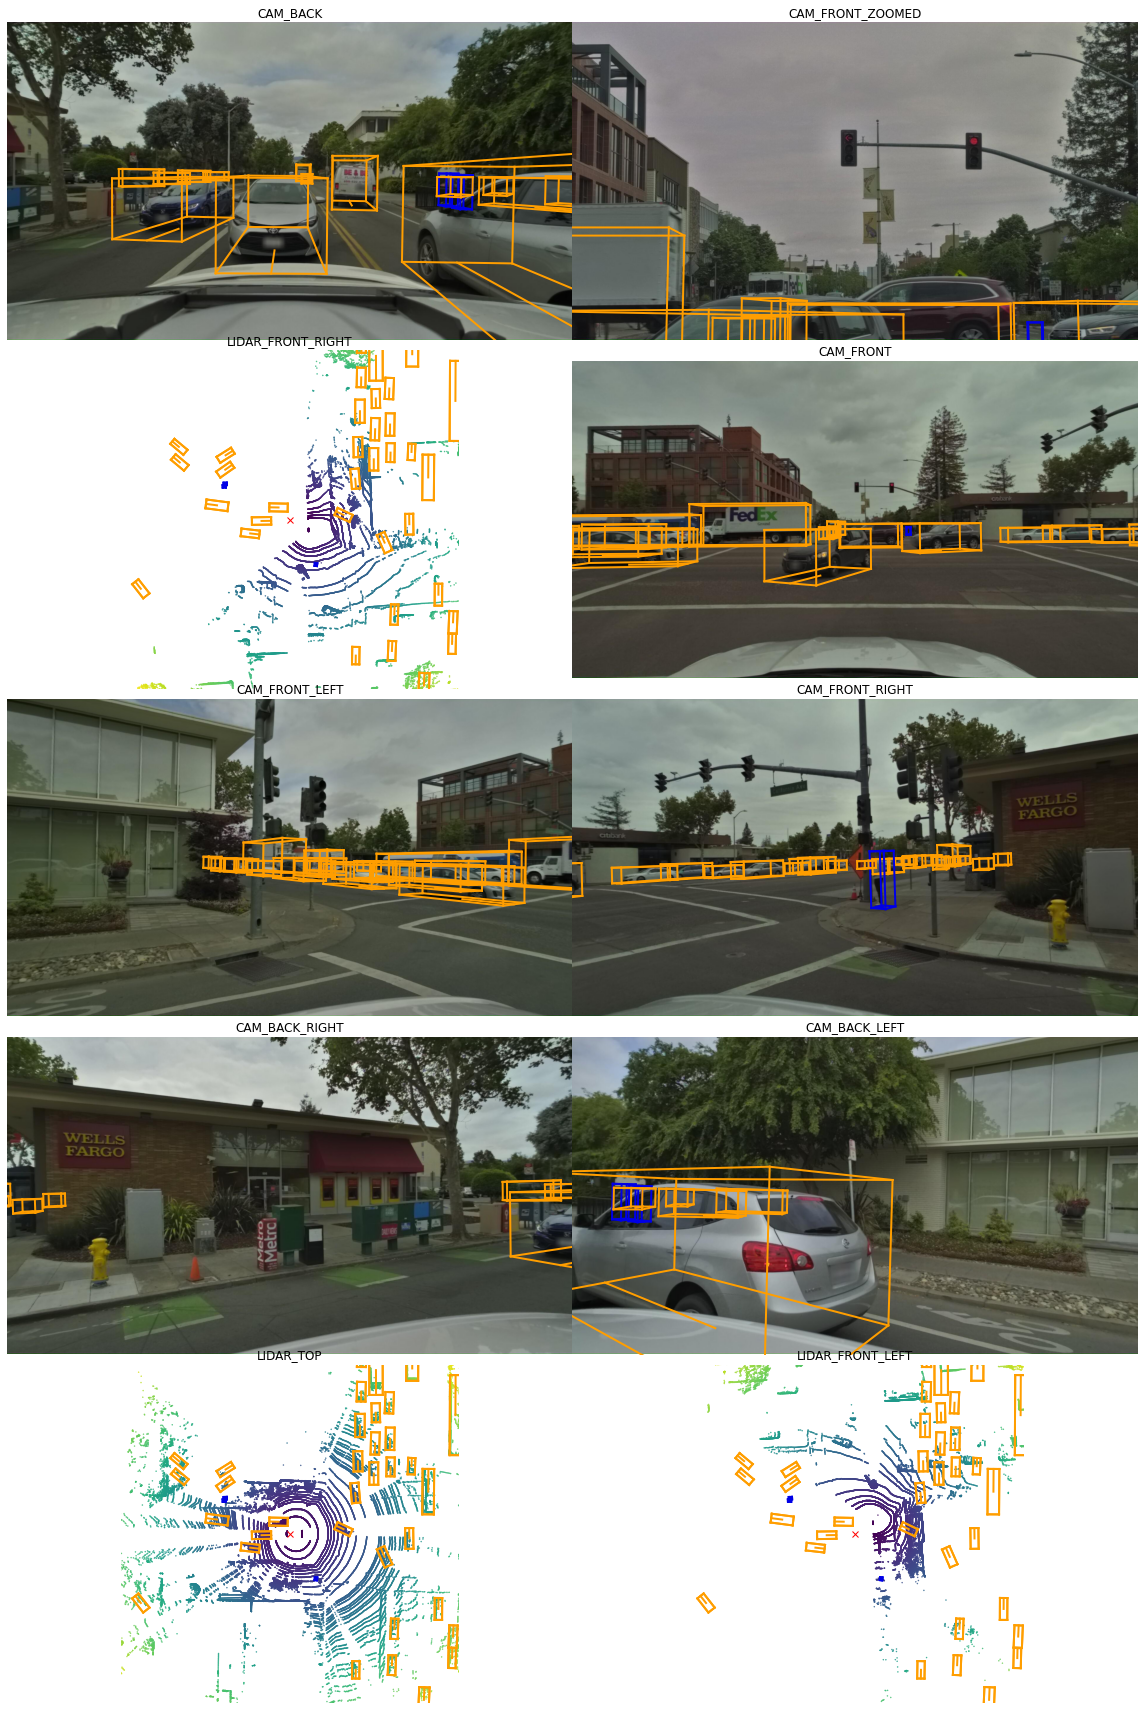

In [8]:
lyftdata.render_sample(one_image_token)

In [9]:
sample = lyftdata.get("sample", one_image_token)

In [10]:
sample

{'next': 'c2ba18e4414ce9038ad52efab44e1a0a211ff1e6b297a632805000510756174d',
 'prev': '',
 'token': '24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8',
 'timestamp': 1557858039302414.8,
 'scene_token': 'da4ed9e02f64c544f4f1f10c6738216dcb0e6b0d50952e158e5589854af9f100',
 'data': {'CAM_BACK': '542a9e44f2e26221a6aa767c2a9b90a9f692c3aee2edb7145256b61e666633a4',
  'CAM_FRONT_ZOOMED': '9c9bc711d93d728666f5d7499703624249919dd1b290a477fcfa39f41b26259e',
  'LIDAR_FRONT_RIGHT': '8cfae06bc3d5d7f9be081f66157909ff18c9f332cc173d962460239990c7a4ff',
  'CAM_FRONT': 'fb40b3b5b9d289cd0e763bec34e327d3317a7b416f787feac0d387363b4d00f0',
  'CAM_FRONT_LEFT': 'f47a5d143bcebb24efc269b1a40ecb09440003df2c381a69e67cd2a726b27a0c',
  'CAM_FRONT_RIGHT': '5dc54375a9e14e8398a538ff97fbbee7543b6f5df082c60fc4477c919ba83a40',
  'CAM_BACK_RIGHT': 'ae8754c733560aa2506166cfaf559aeba670407631badadb065a9ffe7c337a7d',
  'CAM_BACK_LEFT': '01c0eecd4b56668e949143e02a117b5683025766d186920099d1e918c23c8b4b',
  'LIDAR

In [11]:
sample["data"]

{'CAM_BACK': '542a9e44f2e26221a6aa767c2a9b90a9f692c3aee2edb7145256b61e666633a4',
 'CAM_FRONT_ZOOMED': '9c9bc711d93d728666f5d7499703624249919dd1b290a477fcfa39f41b26259e',
 'LIDAR_FRONT_RIGHT': '8cfae06bc3d5d7f9be081f66157909ff18c9f332cc173d962460239990c7a4ff',
 'CAM_FRONT': 'fb40b3b5b9d289cd0e763bec34e327d3317a7b416f787feac0d387363b4d00f0',
 'CAM_FRONT_LEFT': 'f47a5d143bcebb24efc269b1a40ecb09440003df2c381a69e67cd2a726b27a0c',
 'CAM_FRONT_RIGHT': '5dc54375a9e14e8398a538ff97fbbee7543b6f5df082c60fc4477c919ba83a40',
 'CAM_BACK_RIGHT': 'ae8754c733560aa2506166cfaf559aeba670407631badadb065a9ffe7c337a7d',
 'CAM_BACK_LEFT': '01c0eecd4b56668e949143e02a117b5683025766d186920099d1e918c23c8b4b',
 'LIDAR_TOP': 'ec9950f7b5d4ae85ae48d07786e09cebbf4ee771d054353f1e24a95700b4c4af',
 'LIDAR_FRONT_LEFT': '5c3d79e1cf8c8182b2ceefa33af96cbebfc71f92e18bf64eb8d4e0bf162e01d4'}

In [12]:
annotations = lyftdata.get_sample_data(sample["data"]["CAM_FRONT"])

In [13]:
annotations[1][0]

label: nan, score: nan, xyz: [5.58, 1.13, 20.87], wlh: [1.95, 4.67, 1.74], rot axis: [0.15, 0.69, -0.71], ang(degrees): 163.60, ang(rad): 2.86, vel: nan, nan, nan, name: car, token: 3d7bdcb0c99a5ba50cc74b9b9194fe4f2fdfa82a078c8afa561eec9afad052f9

In [14]:
type(annotations[1])

list

In [15]:
lyftdata.list_categories()

Category stats
animal                      n=  186, width= 0.36±0.12, len= 0.73±0.19, height= 0.51±0.16, lw_aspect= 2.16±0.56
bicycle                     n=20928, width= 0.63±0.24, len= 1.76±0.29, height= 1.44±0.37, lw_aspect= 3.20±1.17
bus                         n= 8729, width= 2.96±0.24, len=12.34±3.41, height= 3.44±0.31, lw_aspect= 4.17±1.10
car                         n=534911, width= 1.93±0.16, len= 4.76±0.53, height= 1.72±0.24, lw_aspect= 2.47±0.22
emergency_vehicle           n=  132, width= 2.45±0.43, len= 6.52±1.44, height= 2.39±0.59, lw_aspect= 2.66±0.28
motorcycle                  n=  818, width= 0.96±0.20, len= 2.35±0.22, height= 1.59±0.16, lw_aspect= 2.53±0.50
other_vehicle               n=33376, width= 2.79±0.30, len= 8.20±1.71, height= 3.23±0.50, lw_aspect= 2.93±0.53
pedestrian                  n=24935, width= 0.77±0.14, len= 0.81±0.17, height= 1.78±0.16, lw_aspect= 1.06±0.20
truck                       n=14164, width= 2.84±0.32, len=10.24±4.09, height= 3.44±0.62, lw_asp

In [16]:
relevant_categories = ['bus', 'car', 'emergency_vehicle', 'truck']

In [17]:
def get_coords(annotation):
    if annotation.name in relevant_categories:
        coords =  [0.5] + list(annotation.orientation.yaw_pitch_roll) + list(annotation.center)
        return list(map(lambda x: round(x, 3), coords))
    else:
        return []
    

In [18]:
def test_get_coords():
    from lyft_dataset_sdk.utils.data_classes import Box
    from pyquaternion import Quaternion
    import numpy as np
        
    test_car_orientation = Quaternion(0.1425989552289727, 0.14452239744851175, 0.6826363433881747, -0.7019874908351016)
    test_car_center = np.array([ 5.57585234,  1.12614305, 20.86644111])
    test_car_size = np.array([0, 0, 0])
    test_anno_car = Box(name = 'car', center = test_car_center, size = test_car_size, orientation = test_car_orientation)

    test_anno_car_coords = [0.5, -2.733, -0.008, 1.545, 5.576, 1.126, 20.866]
    assert get_coords(test_anno_car) == test_anno_car_coords
    
    test_anno_pedestrian = Box(name = 'pedestrian', center = test_car_center, size = test_car_size, orientation = test_car_orientation)
    assert get_coords(test_anno_pedestrian) == []

In [19]:
test_get_coords()

In [20]:
def extract_one_image_annotations(anno_boxes):
    one_image_coords = []
    for box in anno_boxes:
        one_image_coords = one_image_coords + get_coords(box)
    return one_image_coords

In [21]:
' '.join([str(x) for x in extract_one_image_annotations(annotations[1])])

'0.5 -2.733 -0.008 1.545 5.576 1.126 20.866 0.5 -0.024 -0.008 1.545 -15.705 1.163 22.421 0.5 -0.004 -0.008 1.545 -14.152 1.267 18.438 0.5 3.13 -0.008 1.545 -27.844 1.293 37.855 0.5 3.129 -0.008 1.545 17.991 1.569 33.513 0.5 -1.573 -0.008 1.545 -3.495 2.132 56.169 0.5 0.081 -0.008 1.545 -9.584 1.192 14.018 0.5 -3.134 -0.008 1.545 1.261 1.309 26.745 0.5 -0.024 -0.008 1.545 -22.353 1.282 22.349 0.5 3.128 -0.008 1.545 -9.788 0.533 31.317 0.5 3.112 -0.008 1.545 29.644 1.821 36.664 0.5 -1.608 -0.008 1.545 -3.747 1.919 46.412 0.5 3.101 -0.008 1.545 22.619 1.089 23.056 0.5 3.097 -0.008 1.545 -15.835 1.514 27.373 0.5 -2.017 -0.008 1.545 -1.036 1.109 11.193 0.5 3.094 -0.008 1.545 24.543 1.596 36.925 0.5 -1.746 -0.008 1.545 -4.406 2.207 80.81'

In [22]:
type(lyftdata.scene[0])

dict

In [23]:
annotations[0].stem

'host-a101_cam0_1241893239250000006'

In [24]:
import pandas as pd
data_list = []
for scene_idx, scene in enumerate(lyftdata.scene):
    print('scene {}'.format(scene_idx))
    first_image_token = scene['first_sample_token']
    last_image_token = scene['last_sample_token']
    current_sample_token = first_image_token
    sample_idx = 0
    while current_sample_token != last_image_token:
        print('sample {}'.format(sample_idx))
        current_sample = lyftdata.get("sample", current_sample_token)
        if(sample_idx % 2 == 0):
            current_sample = lyftdata.get("sample", current_sample_token)
            sensor = 'CAM_FRONT'
            cam_front = lyftdata.get('sample_data', current_sample['data'][sensor])
            calib_camera = lyftdata.get('calibrated_sensor', cam_front['calibrated_sensor_token'])['camera_intrinsic']
            annotations = lyftdata.get_sample_data(current_sample['data'][sensor])
            pred_str = ' '.join([str(x) for x in extract_one_image_annotations(annotations[1])])
            if not pred_str:
                current_sample_token = current_sample['next']
                continue
            data_list.append({'ImageId': annotations[0].stem, 'PredictionString': pred_str, 'CameraIntrinsic': calib_camera})
            
        current_sample_token = current_sample['next']
        sample_idx += 1
        
    
df = pd.DataFrame(data_list)

scene 0
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sa

sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 7
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 

sample 96
sample 96
sample 96
sample 96
sample 96
sample 96
sample 96
sample 96
scene 14
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
s

sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 21
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample

scene 27
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
s

sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 34
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample

sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 41
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample

sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 48
sample 0
sample 1
sample 2

sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 54
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sam

sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 61
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample

sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 67
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sam

sample 44
sample 44
sample 44
sample 44
sample 44
sample 44
sample 44
sample 44
sample 44
sample 44
sample 44
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
scene 74
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
s

sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
sample 24
scene 81
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sa

sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 112
sample 112
sample 112
sample 112
sample 112
sample 112
sample 112
sample 112
sample 112
sample 112
sample 112
sample 113
scene 88
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sam

sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 94
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample

sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 101
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sampl

sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109


sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 114
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sampl

sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample

sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 127
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sampl

sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample

sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sam

sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120

sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 1

sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 161
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sampl

sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
sample 99
sample 100
sample 101
sample 102
sample 103
sample 104
sample 105
sample 106
sample 107
sample 108
sample 109
sample 110
sample 111
sample 112
sample 113
sample 114
sample 115
sample 116
sample 117
sample 118
sample 119
sample 120
sample 121
sample 122
sample 123
sample 124
scene 168
sampl

sample 75
sample 76
sample 77
sample 78
sample 79
sample 80
sample 81
sample 82
sample 83
sample 84
sample 85
sample 86
sample 87
sample 88
sample 89
sample 90
sample 91
sample 92
sample 93
sample 94
sample 95
sample 96
sample 97
sample 98
scene 174
sample 0
sample 1
sample 2
sample 3
sample 4
sample 5
sample 6
sample 7
sample 8
sample 9
sample 10
sample 11
sample 12
sample 13
sample 14
sample 15
sample 16
sample 17
sample 18
sample 19
sample 20
sample 21
sample 22
sample 23
sample 24
sample 25
sample 26
sample 27
sample 28
sample 29
sample 30
sample 31
sample 32
sample 33
sample 34
sample 35
sample 36
sample 37
sample 38
sample 39
sample 40
sample 41
sample 42
sample 43
sample 44
sample 45
sample 46
sample 47
sample 48
sample 49
sample 50
sample 51
sample 52
sample 53
sample 54
sample 55
sample 56
sample 57
sample 58
sample 59
sample 60
sample 61
sample 62
sample 63
sample 64
sample 65
sample 66
sample 67
sample 68
sample 69
sample 70
sample 71
sample 72
sample 73
sample 74
sample 75


In [25]:
df.head()

,ImageId,PredictionString,CameraIntrinsic
0,host-a101_cam0_1241893239250000006,0.5 -2.733 -0.008 1.545 5.576 1.126 20.866 0.5...,"[[1109.05239567, 0, 957.849065461], [0.0, 1109..."
1,host-a101_cam0_1241893239650000006,0.5 -1.912 -0.008 1.545 -1.886 1.074 8.784 0.5...,"[[1109.05239567, 0, 957.849065461], [0.0, 1109..."
2,host-a101_cam0_1241893240050000006,0.5 -1.608 -0.008 1.545 -3.747 1.919 46.412 0....,"[[1109.05239567, 0, 957.849065461], [0.0, 1109..."
3,host-a101_cam0_1241893240450000006,0.5 3.124 -0.008 1.545 -25.546 0.574 31.615 0....,"[[1109.05239567, 0, 957.849065461], [0.0, 1109..."
4,host-a101_cam0_1241893240850000006,0.5 -3.123 -0.008 1.545 -1.769 1.64 33.68 0.5 ...,"[[1109.05239567, 0, 957.849065461], [0.0, 1109..."


In [26]:
len(df)

10532

In [27]:
df.to_csv('train_lyft.csv')

In [28]:
lyftdata.scene[1]

{'description': '',
 'first_sample_token': '3b30673b9d944ec6058ef5a8debb4c0a6fe075bca7076e06cf42a2bc10dc446e',
 'log_token': '0a6839d6ee6804113bb5591ed99cc70ad883d0cff396e3aec5e76e718771b30e',
 'name': 'host-a006-lidar0-1236037883198113706-1236037908098879296',
 'token': '0a6839d6ee6804113bb5591ed99cc70ad883d0cff396e3aec5e76e718771b30e',
 'last_sample_token': '5ec01e4634ca91751311eaafb45a9196ba8616bf05edc85593aff158db653a34',
 'nbr_samples': 126}

In [29]:
lyftdata.get("sample", 'ce98b8dc91826ce97c05fdb21da8585a085052c3e652654ebfa00634ecd95c80')

{'next': '53c1e7c854f1a3b2f3ae8aab2bca82c9f138937102a25aa36a71a838ab488ba8',
 'prev': 'b3df76d043d6ae1438be78e75f4553cad142aedecd5a15a9f87aaa51943eea3f',
 'token': 'ce98b8dc91826ce97c05fdb21da8585a085052c3e652654ebfa00634ecd95c80',
 'scene_token': '0a6839d6ee6804113bb5591ed99cc70ad883d0cff396e3aec5e76e718771b30e',
 'timestamp': 1552002683701372.2,
 'data': {'CAM_FRONT_RIGHT': '20c93a2fb332deb66e481413707169d04b82396dc02939b27f494c843dba356a',
  'CAM_FRONT_LEFT': 'a96e9b2ec165493ecfff5f0be76c04053c55c62e37ef41b831fbe5e2f855c74e',
  'LIDAR_TOP': 'a9961cf3399fcbd556ce06e351ca499ea302f1856c6d25d3eaba235077c823f0',
  'CAM_BACK_RIGHT': 'bb53f70d8762f93ed26996329e572c736eb512c60b0cd66a9541b3edc322735f',
  'CAM_FRONT_ZOOMED': 'fd0dd7e97597e27d30adfd0c0a8739af181f03f027e2ccceaf6eab7c14e7a38c',
  'CAM_FRONT': '6fbaf621f6d77e1d5f096a86bad86719cbd4603d06564e49d80e886b34ad72fa',
  'CAM_BACK_LEFT': '4602eb38ec4e616ee706776f36e57b69a799fd92df22fb78c8c8fa5d4a49cfbb',
  'CAM_BACK': '1cb27539994114e0d9d